In [1]:
import sys
sys.path.append("../../")

In [2]:
from crawl.ssi.stock_market_data_ssi import get_stock_market_data
from datetime import datetime
import mplfinance as mpf
import pandas as pd
import matplotlib.pyplot as plt
from ta import add_all_ta_features
from ta.utils import dropna
import ta
import ta.momentum

In [4]:
btc_df = pd.read_csv("./data/btc-2024-09-17-to-2024-11-03.csv")

In [5]:
btc_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...
3695,2024-10-29 00:00:00+00:00,69910.046875,73577.210938,69729.914062,72720.492188,58541874402,0.0,0.0
3696,2024-10-30 00:00:00+00:00,72715.367188,72905.296875,71411.734375,72339.539062,40646637831,0.0,0.0
3697,2024-10-31 00:00:00+00:00,72335.046875,72662.312500,69590.500000,70215.187500,40627912076,0.0,0.0
3698,2024-11-01 00:00:00+00:00,70216.898438,71559.015625,68779.703125,69482.468750,49989795365,0.0,0.0


In [6]:

btc_df["Date"] = pd.to_datetime(btc_df["Date"])
btc_df.set_index("Date", inplace=True)


In [16]:
btc_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,macd,macd_signal,macd_histogram
Date,,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,NaN,NaN,NaN
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,NaN,NaN,NaN
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,NaN,NaN,NaN
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,NaN,NaN,NaN
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-10-29 00:00:00+00:00,69910.046875,73577.210938,69729.914062,72720.492188,58541874402,0.0,0.0,1793.151267,1493.893830,299.257436
2024-10-30 00:00:00+00:00,72715.367188,72905.296875,71411.734375,72339.539062,40646637831,0.0,0.0,1987.905567,1592.696178,395.209389
2024-10-31 00:00:00+00:00,72335.046875,72662.312500,69590.500000,70215.187500,40627912076,0.0,0.0,1948.372708,1663.831484,284.541224


In [17]:
btc_df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'macd', 'macd_signal', 'macd_histogram'],
      dtype='object')

In [18]:
# Thêm chỉ số MACD vào DataFrame
btc_df["macd"] = ta.trend.macd(btc_df["Close"])
btc_df["macd_signal"] = ta.trend.macd_signal(btc_df["Close"])
btc_df["macd_histogram"] = ta.trend.macd_diff(btc_df["Close"])

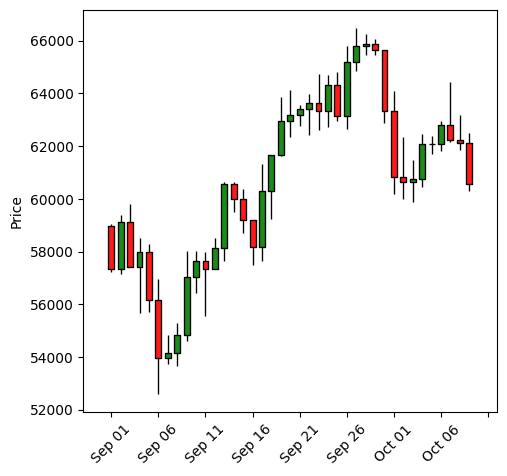

In [20]:
# Thiết lập màu sắc cho nến tăng và nến giảm
mc = mpf.make_marketcolors(up='green', down='red', wick='black', edge='black', volume='inherit')
style = mpf.make_mpf_style(marketcolors=mc)

adps = [
    # mpf.make_addplot(btc_df["2024-09-01":"2024-10-09"]["macd"], panel=2, color="blue", ylabel="MACD"),
    # mpf.make_addplot(btc_df["2024-09-01":"2024-10-09"]["macd_signal"], panel=2, color="red"),
    # mpf.make_addplot(btc_df["2024-09-01":"2024-10-09"]["macd_histogram"], type="bar", panel=2, color="gray", alpha=0.5),
]

# Vẽ biểu đồ nến với khối lượng và ẩn các trục
fig = mpf.plot(
    btc_df["2024-09-01":"2024-10-09"], 
    type='candle', 
    style=style, 
    volume=False,  # Hiển thị khối lượng
    axisoff=False,  # Bỏ trục x và y
    returnfig=False,  # Trả về đối tượng Figure để tùy chỉnh
    figratio=(5,5),  # Điều chỉnh tỷ lệ khung hình để thu hẹp khoảng cách
    figscale=1,  # Tăng kích thước biểu đồ để làm các nến gần nhau hơn
    addplot=adps,
    # panel_ratios=(6, 1, 1),
)

# Loại bỏ các nhãn trục và tiêu đề
# for ax in axlist:
#     print(type(ax))
#     ax.set_xticks([])
#     ax.set_yticks([])
#     ax.set_title("")
#     ax.set_xlabel("")
#     ax.set_ylabel("")

# # Hiển thị biểu đồ
# fig.show()

# fig.savefig("./picture_candle/candlestick_chart.png", format="png", bbox_inches="tight", pad_inches=0)


In [21]:
fig.show()

AttributeError: 'NoneType' object has no attribute 'show'